# Assignment 9

## 1. SVM (Linearly Seperable Data)

### You are given a two dimensional dataset (SVM_Q1) with 4 classes and you have to use SVM for classification.

### Import the required libraries 

In [33]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import matplotlib as m
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

### The code for loading data is given below.

In [34]:
# load data (do not change it)
import numpy as np
X_train, X_test, y_train, y_test = np.load('./SVM_Q1.npy', allow_pickle=True)

### 1.a) Write code to visualize the training data

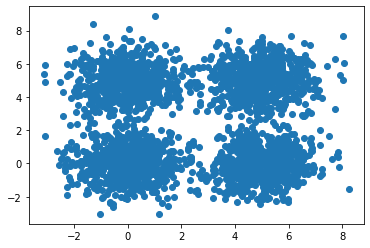

In [35]:
plt.scatter(X_train[:,0],X_train[:,1])

### 1.b) Write the code for SVM classifier (you can write code from scratch or use sklrean)

In [36]:
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 1.c) Generate the confusion matrix for the classifer on the test data

In [37]:
y_pred=svm.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[327,   4,   5,   0],
       [  3, 324,   0,   1],
       [  3,   0, 336,   1],
       [  0,   1,   1, 314]])

### 1.d) Visualize the support vectors and decision boundary

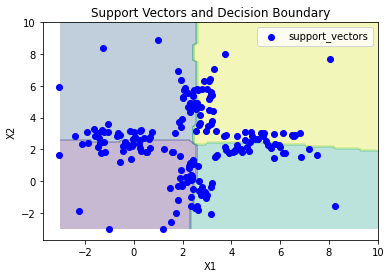

In [38]:
x1 = np.linspace(-3,10,100)
x2 = np.linspace(-3,10,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],color='b',label='support_vectors')
plt.legend();
plt.xlabel('X1')
plt.ylabel('X2');
plt.title('Support Vectors and Decision Boundary');

### 1.e) Report the accuracy obtained 

In [39]:
accuracy_score(y_test,y_pred)

0.9856060606060606

## 2. SVM (Non-linearly separable Data)

### You are given a two dimensional dataset with 2 classes as loaded below and you have to use SVM for classification.

In [40]:
# generating data (do not change it)
from sklearn.datasets import make_circles 
X, Y = make_circles(n_samples = 3000, noise = 0.04) 

### 2.a) Use train_test_split function in sklearn to split the dataset into train and test sets in the ratio of 80:20

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=15)

### 2.b) Write the code for SVM classifier with polynomial kernel (you can write code from scratch or use sklrean)

Hint: Use kernel of degree 8.

In [42]:
svm=SVC(kernel='poly', degree=8)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 2.c) Generate the confusion matrix for the classifer on the test data

In [43]:
y_pred=svm.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[300,   3],
       [  2, 295]])

### 2.d) Visualize the support vectors and plot the decision boundary

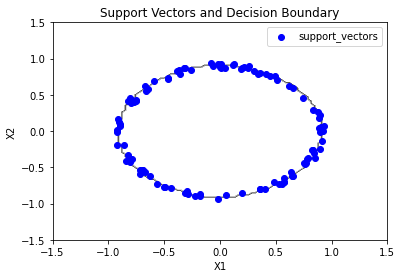

In [44]:
x1 = np.linspace(-1.5,1.5,100)
x2 = np.linspace(-1.5,1.5,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3,cmap=m.colors.ListedColormap(['white','black','white']))
plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],color='b',label='support_vectors')
plt.legend();
plt.xlabel('X1')
plt.ylabel('X2');
plt.title('Support Vectors and Decision Boundary');

### 2.e) Report the accuracy obtained 

In [45]:
accuracy_score(y_test,y_pred)

0.9916666666666667

### 2.f) Repeat the above steps with sigmoid kernel (you can write code from scratch or use sklearn). You can tune the parameter to obtain better accuracy on test set.

In [55]:
from sklearn.model_selection import GridSearchCV 
svm=SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [100,10,1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['sigmoid']
            }  
grid = GridSearchCV(svm, param_grid, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.523, total=   0.1s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.535, total=   0.1s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.517, total=   0.1s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.519, total=   0.1s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.498, total=   0.1s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] ..... C=0.1, gamma=10, kernel=sigmoid, score=0.544, total=   0.1s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] ..... C=0.1, gamma=10, kernel=sigmoid, score=0.469, total=   0.1s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] ..... C=0.1, gamma=10, kernel=sigmoid, score=0.533, total=   0.2s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] ..... C=0.1, gamma=10, kernel=sigmoid, score=0.523, total=   0.1s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] ..... C=0.1, gamma=10, kernel=sigmoid, score=0.500, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.512, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   27.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [47]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [74]:
svm=SVC(C=1000,gamma=0.1,kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[162, 141],
       [146, 151]])

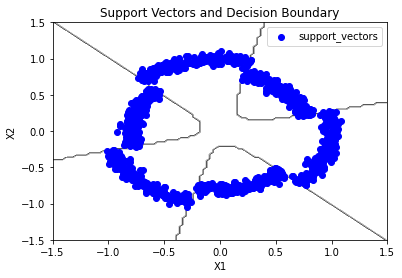

In [75]:
x1 = np.linspace(-1.5,1.5,100)
x2 = np.linspace(-1.5,1.5,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred_ = grid.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3,cmap=m.colors.ListedColormap(['white','black','white']))
plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],color='b',label='support_vectors')
plt.legend();
plt.xlabel('X1')
plt.ylabel('X2');
plt.title('Support Vectors and Decision Boundary');

In [76]:
accuracy_score(y_test,y_pred)

0.5216666666666666

### 2.g) Reapeat the steps 2.c to 2.g with  radial basis function kernel (you can write code from scratch or use sklrean). You can tune the parameter to obtain better accuracy on test set.

In [77]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [10,1, 0.1, 0.01, 0.001, 0.0001],'kernel':['rbf']}  
grid = GridSearchCV(svm, param_grid,cv=5, verbose = 10) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.994, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.994, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.990, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.994, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.994, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.994, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.996, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.990, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.994, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.996, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.502, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.646, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.502, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   14.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1000, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='sigmoid', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [78]:
y_pred=grid.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[302,   1],
       [  3, 294]])

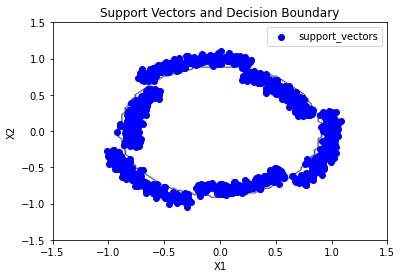

In [80]:
x1 = np.linspace(-1.5,1.5,100)
x2 = np.linspace(-1.5,1.5,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred_ = grid.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3,cmap=m.colors.ListedColormap(['white','black','white']))
plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],color='b',label='support_vectors')
plt.legend();
plt.xlabel('X1')
plt.ylabel('X2');
plt.title('Support Vectors and Decision Boundary');

In [79]:
accuracy_score(y_test,y_pred)

0.9933333333333333

### 2.h) For which kernal in SVM, you have obtained the highest and lowest  accuracy? What do you think the reason for it? 

### Ans: RBF kernel has the highest accuracy(0.99333) and the Sigmoid kernel has the least accuracy (0.52166). This is because the kernel transformation of RBF is most suited for the circular data classification. Whereas the SVM with sigmoid kernel is a 2 layer perceptron which is not that complex to classify a circular distributed data.